<a href="https://colab.research.google.com/github/KunhuiPan/PyTorch-for-deep-learning/blob/master/notes/00_PyTorch_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)


1.13.1+cu116


# Introduction to Tensors


PyTorch Tensors

*   an object stores a multidimensional matrix containing elements of a single data type
*   a tensor has a large number of attributes and functions

*   a PyTorch tensor has a similar interface to numpy arrays









## Creating tensors


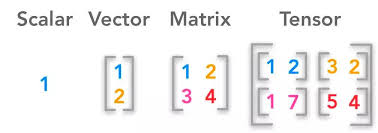

In [ ]:
# Scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [ ]:
# The dimension of this scalar
scalar.ndim

0

In [ ]:
# Get tensor back as Python int: .item() only works with one element tensor
scalar.item()

7

In [ ]:
# Vector
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [ ]:
# One way to know dimension of a tensor is to count the number of pair-closing square brackets
vector.ndim

1

In [ ]:
vector.shape

torch.Size([2])

In [ ]:
# Matrix
matrix=torch.tensor([[7,8],
                     [9,10]])
matrix


tensor([[ 7,  8],
        [ 9, 10]])

In [ ]:
matrix.ndim

2

In [ ]:
matrix[0]

tensor([7, 8])

In [ ]:
matrix[1]

tensor([ 9, 10])

In [ ]:
matrix.shape # four elements in this matrix

torch.Size([2, 2])

In [ ]:
# Tensor
tensor=torch.tensor([[[1,2,3],
                     [3,6,9],
                     [2,4,5]]])
tensor

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [ ]:
tensor.ndim

3

In [ ]:
tensor.shape # one three by three tensor

torch.Size([1, 3, 3])

In [ ]:
tensor[0]

tensor([[1, 2, 3],
        [3, 6, 9],
        [2, 4, 5]])

### Random tensors

Why random tensors?

Random tensors are important because the way many neural networks learn is that they start with tensors full of random numbers and then adjust those random numbers to better represent the data.



```
Start with random numbers -> look at data -> update the random numbers -> look at data -> update random numbers'
```
Torch random tensors - https://pytorch.org/docs/stable/generated/torch.rand.html


In [ ]:
# Create a random tensor of shape (3,4)
random_tensor=torch.rand(3,4)
random_tensor

tensor([[0.6378, 0.6107, 0.3433, 0.4442],
        [0.7670, 0.5443, 0.1367, 0.5852],
        [0.5304, 0.0088, 0.1177, 0.6318]])

In [ ]:
random_tensor.ndim

2

In [ ]:
random_tensor.shape

torch.Size([3, 4])

In [ ]:
# Create a random tensor with similar shape to an image tensor
random_image_size_tensor = torch.rand(size=(224, 224, 3)) # height, width, colour channels (R, G, B)
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

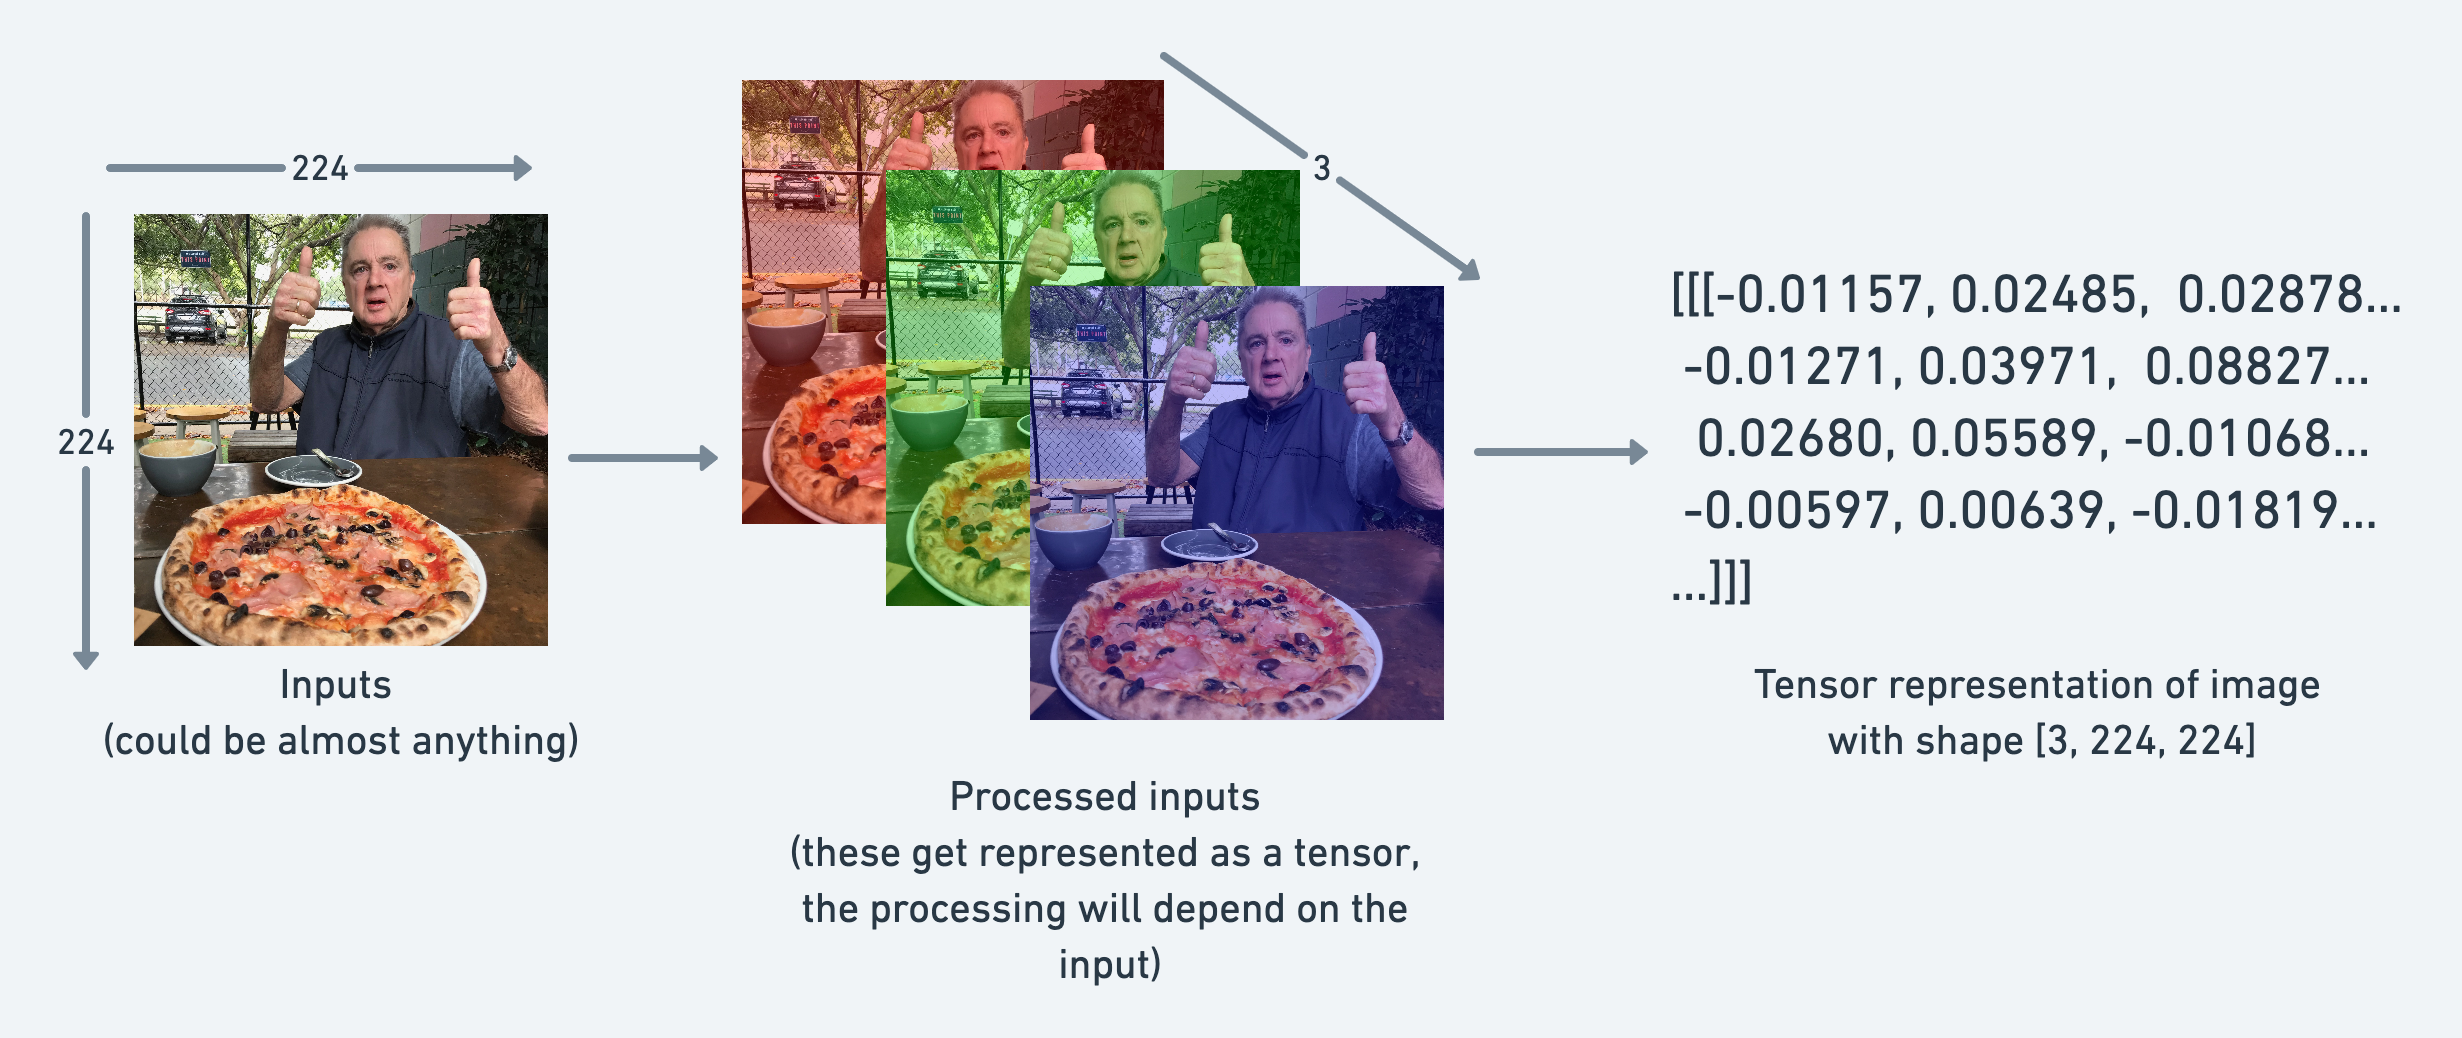

### Zeros and ones


In [ ]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3,4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
# Create a tensor of all ones
ones = torch.ones(size=(3,4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
ones.dtype

torch.float32

### Creating a range of tensors and tensors-like

In [ ]:
# Use torch.range() and get deprecated message, use torch.arange()
one_to_ten = torch.arange(start=0,end=11,step=1)
one_to_ten

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
# Creating tensors like，a tensor filled with zeros that has the same dimensions as tensor one_to_ten
ten_zeros = torch.zeros_like(input=one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# a tensor filled with ones that has the same dimensions as tensor one_to_ten
ten_ones = torch.ones_like(input=one_to_ten)
ten_ones

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Tensor datatypes

**Note**: Tensor datatype is one of the 3 big errors you'll run into with PyTorch & deep learning:


1.   Tensor not right type
2.   Tensor not right shape
3.   Tensor not on the right device







In [ ]:
# Float 32 tensor
float_32_tensor = torch.tensor([3., 6., 9.],
                               dtype=None, # data type e.g.(float 32, float 16)
                               device=None, # "cpu", "cuda"
                               requires_grad=False) # whether or not to track gradients with this tensors operations
float_32_tensor, float_32_tensor.dtype

(tensor([3., 6., 9.]), torch.float32)

In [ ]:
# change data type from float 32 to float 16
float_16_tensor = float_32_tensor.type(torch.float16) 
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [ ]:
float_16_tensor * float_32_tensor

tensor([ 9., 36., 81.])

In [ ]:
# Int 32 tensor
int_32_tensor = torch.tensor([3,6,9], dtype=torch.int32)
int_32_tensor

tensor([3, 6, 9], dtype=torch.int32)

In [ ]:
float_32_tensor * int_32_tensor

tensor([ 9., 36., 81.])

### Getting information from tensor
1.   Tensor not right type - `tensor.dtype`
2.   Tensor not right shape - `tensor.shape`
3.   Tensor not on the right device - `tensor.device`

In [ ]:
some_tensor = torch.rand(3,4)
some_tensor

tensor([[0.1980, 0.9611, 0.7961, 0.2240],
        [0.9639, 0.1259, 0.5296, 0.2362],
        [0.6035, 0.1164, 0.2117, 0.7449]])

In [ ]:
# Find out details about some tensor
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Device of tensor: {some_tensor.device}")

Datatype of tensor: torch.float32
Shape of tensor: torch.Size([3, 4])
Device of tensor: cpu


### Manipulating Tensors (tensor operations)

Tensor operations include:
* Addition
* Substraction
* Multiplication (elment-wise)
* Division
* Matrix multiplication

In [ ]:
# Create a tensor and add 10 to it
tensor = torch.tensor([1,2,3])
tensor + 10

tensor([11, 12, 13])

In [ ]:
# Multiply by ten
tensor * 10

tensor([10, 20, 30])

In [ ]:
# Substract 10
tensor - 10

tensor([-9, -8, -7])

In [ ]:
# Try out PyThorch in-built function
# Multiplying each element by 10
torch.mul(tensor, 10)

tensor([10, 20, 30])

In [ ]:
torch.add(tensor, 10)

tensor([11, 12, 13])

### Matrix multiplication

1. Element-wise multiplication
2. Matrix multiplication (dot product)

More information of matrix multiplication: https://www.mathsisfun.com/algebra/matrix-multiplying.html

There are two main rules that performing matrix multiplication needs to satisfy:
1. the **innner dimensions** must match ("@" for matrix multiplication):

```
* (3,2) @ (3,2) won't work
* (2,3) @ (3,2) will work
* (3,2) @ (2,3) will work
```
2. The resulting matrix has the shape of the **outer dimensions**:

```
* (2,3) @ (3,2) -> (2,2)
* (3,2) @ (2,3) -> (3,3)
```





In [ ]:
torch.matmul(torch.rand(3,2), torch.rand(2,3)).shape

torch.Size([3, 3])

In [ ]:
print(tensor, "*", tensor)
print(f"Equals: {tensor * tensor}")

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


In [ ]:
# Matrix multiplication/dot product
torch.matmul(tensor, tensor)

tensor(14)

time used varies differnt methods

In [ ]:
%%time
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
print(value)

tensor(14)
CPU times: user 1.81 ms, sys: 166 µs, total: 1.98 ms
Wall time: 3.47 ms


In [ ]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 87 µs, sys: 0 ns, total: 87 µs
Wall time: 91.3 µs


tensor(14)

### One of the most common errors in deep learning: shape errors


In [ ]:
# shapes for matrix multiplication
tensor_A = torch.tensor([[1,2],
                        [3,4],
                        [5,6]])
tensor_B = torch.tensor([[7,10],
                        [8,11],
                        [9,12]])
tensor_A.shape, tensor_B.shape


(torch.Size([3, 2]), torch.Size([3, 2]))

To fix tensor shape issues, using **transpose**

In [ ]:
# torch.mm(tensor_A, tensor_B) is the samle as torch.matmul
tensor_B

tensor([[ 7, 10],
        [ 8, 11],
        [ 9, 12]])

In [ ]:
tensor_B.T, tensor_B.T.shape

(tensor([[ 7,  8,  9],
         [10, 11, 12]]), torch.Size([2, 3]))

In [ ]:
# The matrix multiplication operation works when tensor_B is transposed
torch.mm(tensor_B, tensor_B.T)

tensor([[149, 166, 183],
        [166, 185, 204],
        [183, 204, 225]])

## Finding the min, max, mean, sum, etc(tensor aggregation)

In [ ]:
# Create a tensor
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
# Find the max
torch.max(x), x.max()

(tensor(90), tensor(90))

In [ ]:
# Find the mean - note: the torch.mean() function requires a tensor of float32 datatype to work
x.dtype
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()


(tensor(45.), tensor(45.))

In [ ]:
# Find the sum
torch.sum(x), x.sum()

(tensor(450), tensor(450))

## Finding the positional min and max 

In [ ]:
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
# Find the position in tensor that has the minimum value with argmin() -> returns index postion of target tensor where the minimum value occurs
x.argmin() # Returns the indices of the minimum value(s) of the flattened tensor or along a dimension

tensor(0)

In [ ]:
x[0]

tensor(0)

In [ ]:
# Find the position in tensor that has the maximum value with argmax()
x.argmax()

tensor(9)

In [ ]:
x[9]

tensor(90)

## Reshaping, stacking, squeezing and unsequeezing tensors

* Reshaping - reshapes an input tensor to a defined shape
* View - Return a view of an input tensor of certain shape but keep the same memory as the original tensor
* Stacking - conbine multiple tensors on top of each other (vstack) or side by side
* Squeeze - remove all 1 dimensions from a tensor
* Unsqueeze - add a 1 dimension to a target tensor
* Permute - return a view of the input with dimensions permuted (swapped) in a certain way



In [ ]:
# Create a tensor
import torch
x = torch.arange(1., 10.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [ ]:
# Add an extra dimension
x_reshaped = x.reshape(9,1)
x_reshaped, x_reshaped.shape

(tensor([[1.],
         [2.],
         [3.],
         [4.],
         [5.],
         [6.],
         [7.],
         [8.],
         [9.]]), torch.Size([9, 1]))

In [ ]:
# Change the view
z = x.view(1,9) # z is just a view of x, they share same memory
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
# Change z change x (because a view of a tensor shares the same memory as the original input)
z[:, 0] = 5 # change the first element
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [ ]:
# Stack tensors on top of each other
x_stacked_0 = torch.stack([x,x,x,x], dim=0)
x_stacked_1 = torch.stack([x,x,x,x], dim=1)
x_stacked_0, x_stacked_1

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
         [5., 2., 3., 4., 5., 6., 7., 8., 9.],
         [5., 2., 3., 4., 5., 6., 7., 8., 9.],
         [5., 2., 3., 4., 5., 6., 7., 8., 9.]]), tensor([[5., 5., 5., 5.],
         [2., 2., 2., 2.],
         [3., 3., 3., 3.],
         [4., 4., 4., 4.],
         [5., 5., 5., 5.],
         [6., 6., 6., 6.],
         [7., 7., 7., 7.],
         [8., 8., 8., 8.],
         [9., 9., 9., 9.]]))

In [ ]:
x_reshaped = x.reshape(1,9)
x_reshaped, x_reshaped.shape

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
# torch.squeeze() - removes all sigle dimensions from a target tensor
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimensions from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")


Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
Previous shape: torch.Size([1, 9])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
New shape: torch.Size([9])


In [ ]:
# torch.unsqueeze() - adds a single dimension to a target tensor at a specific dimension
print(f"Previous target: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

# Add an extra dimension with unsqueeze in dim=0
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New tensor shape: {x_unsqueezed.shape}")

Previous target: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
Previous shape: torch.Size([9])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
New tensor shape: torch.Size([1, 9])


In [ ]:
# torch.permute - rearrange the dimensions of a target tensor at a specific 
x_original = torch.rand(size=(224, 224, 3)) #[height, width, colour_channels]

# Permute the original tensor to rearrange the axis (or dim) order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}") # [colour_channels, height, width]

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


In [ ]:
x_original[0, 0, 0] = 7788
x_original[0, 0, 0], x_permuted[0, 0, 0]

(tensor(7788.), tensor(7788.))

## Indexing (selecting data from tensor)
Indexing with PyTorch is similar to indexing with Numpy


In [ ]:
# Create a tensor
import torch
x = torch.arange(1,10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]), torch.Size([1, 3, 3]))

In [ ]:
# Let's index on our new tensor
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
# Let's index on the middle bracket (dim=1)
x[0,0], x[0][0] # the first braket and the first three value


(tensor([1, 2, 3]), tensor([1, 2, 3]))

In [ ]:
# Let's index on the most inner bracket (last dimension)
x[0][0][0], x[0, 0, 1]

(tensor(1), tensor(2))

In [ ]:
# To get number 9
x[0][2][2]

tensor(9)

In [ ]:
# Using ":" to select "all" of a target dimension
x[:, 0]

tensor([[1, 2, 3]])

In [ ]:
# get all values of 0th and 1th diensions but only index 1 of 2nd dimension (index all rows in this column)
x[:, :, 1]

tensor([[2, 5, 8]])

In [ ]:
# Get all values of the 0 dimension but only 1 index value of 1st and 2nd dimension
x[:, 1, 1] # return a tensor with one dimension indicated by the square bracket

tensor([5])

In [ ]:
# Get index of 0 of 0th and 1st dimension and all values of 2nd dimension
x[0, 0, :]

tensor([1, 2, 3])

In [ ]:
# Index on x to return 9
print(x[:, 2, 2]), print(x[0][2][2])
# Index on x to return 3,6,9
print(x[:, :, 2])

tensor([9])
tensor(9)
tensor([[3, 6, 9]])


## PyTorch tensors and Numpy

Numpy is a popular scientific Python numerical computing library.

And because of this, PyTorch has functionality to interact with it.

* Data in NumPy, want in PyTorch tensor -> **torch.from_numpy(ndarray)**
* PyTorch tensor -> Numpy -> **torch.Tensor.numpy()**



In [ ]:
# NumPy array to tensor
import torch
import numpy as np
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array) # warning: when converting from numpy -> pytorch reflects numpy's default datatype of float64 unless specified otherwise
array, tensor



(array([1., 2., 3., 4., 5., 6., 7.]), tensor([1., 2., 3., 4., 5., 6., 7.]))

In [ ]:
array.dtype

dtype('float64')

In [ ]:
# Change the value of array, what will this do to "tensor"?
array = array+1
array, tensor
# Change the numpy does not change the tensor

(array([2., 3., 4., 5., 6., 7., 8.]), tensor([1., 2., 3., 4., 5., 6., 7.]))

In [ ]:
# Tensor to NumPy array
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [ ]:
# Change the tensor, what happens to "numpy_tensor"?
tensor = tensor + 1
tensor, numpy_tensor
# Change the tensor does not change the array, they don't share same memory

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## Reproducibility (trying to take random out of random)

In short how a neural network learns:
`start with random numbers -> tensor operations -> update random numbers to try and make them better representations of the data -> again -> again ->again...

To reduce the randomness in neural networks and PyTorch comes the concept of a **random seed**

In [ ]:
import torch
# Create two random tensors
random_tensor_A = torch.rand(3,4)
random_tensor_B = torch.rand(3,4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)


tensor([[0.7597, 0.5145, 0.0314, 0.3591],
        [0.9445, 0.7813, 0.9352, 0.2497],
        [0.6447, 0.6276, 0.1501, 0.4480]])
tensor([[0.9405, 0.6591, 0.6162, 0.4149],
        [0.3543, 0.7278, 0.8121, 0.8557],
        [0.4989, 0.1246, 0.8757, 0.3478]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [ ]:
# Let's make some random but reproducible tensor
import torch

random_seed = 42
torch.manual_seed(random_seed)
random_tensor_C = torch.rand(3, 4)

torch.manual_seed(random_seed)
random_tensor_D = torch.rand(3, 4)

print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


Extra resources for reproducibility:
- https://pytorch.org/docs/stable/notes/randomness.html






## Running tensors and PyTorch objects on the GPUs (and making faster computations)
GPUs = faster computation on numbers, thanks to CUDA + NVIDIA hardware + PyTorch working hebind the senes to make everything hunky


### 1. Getting a GPU
1. Easiest - use Google Colab 
2. Use your own GPU - takes a little bit of setup and requires the investement of purchasing a GPU: https://timdettmers.com/2023/01/30/which-gpu-for-deep-learning/
3. Use cloud computing - GCP, AWS, Azure, these services allow you to rent computers on the clound and access them

For 2, 3 PyTorch + GPU drivers(CUDA) takes a little bit of setting up to do this, refer to PyTorch setup documentation: https://pytorch.org/get-started/locally/


In [ ]:
!nvidia-smi # Tesla T4

Mon Feb 13 19:58:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    27W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
### Check for GPU access with PyTorch
import torch
torch.cuda.is_available()

True

For PyTorch since it's capable of running compute on the GPU or CPU, it's best practice to setup device agnostic code: https://pytorch.org/docs/stable/notes/cuda.html#best-practices

E.g. run on GPU if available, else default to CPU

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Count number of devices
torch.cuda.device_count()

1

## 3. Putting tensors and models on the GPU

Using a GPU results in faster computations

In [ ]:
# Create a tensor (default on the CPU)
tensor = torch.tensor([1, 2, 3])

print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [ ]:
# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

In [ ]:
# To fix the GPU tebsor with Numpy issue, we can first set it to the CPU
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

In [ ]:
tensor_on_gpu
# Change the tensor does not change the array, they don't share same memory

tensor([1, 2, 3], device='cuda:0')